### Пример создания свёрточной сети LeNet-5  
\
\
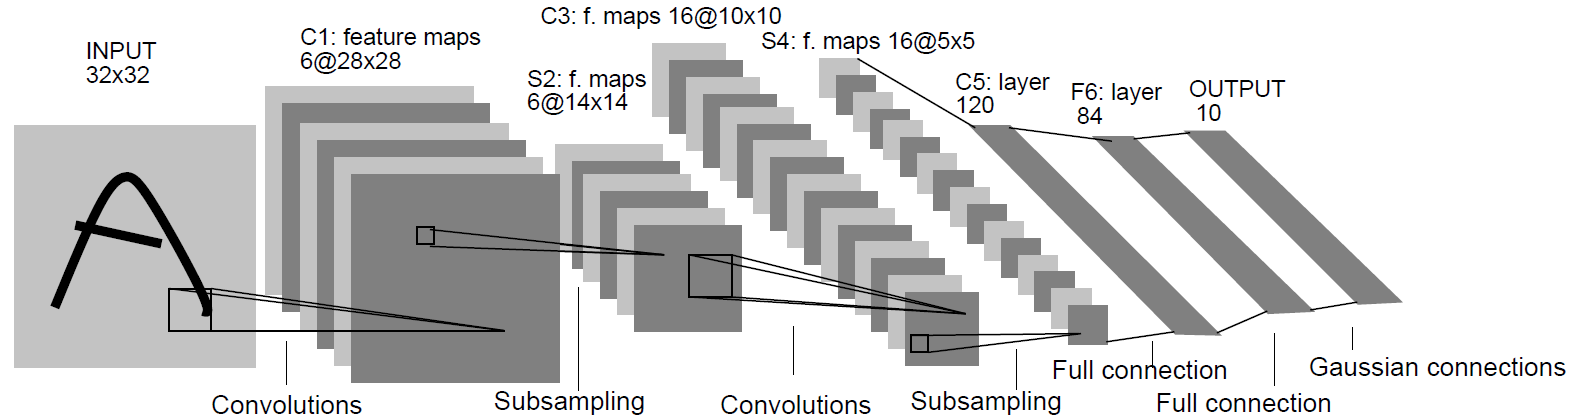

In [1]:
import torch.nn as nn
from collections import OrderedDict

In [2]:
class LeNet5(nn.Module):

    def __init__(self, n_classes):
        super(LeNet5, self).__init__()
        
        self.feature_extractor = nn.Sequential(OrderedDict([
            ('conv1', nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1)),
            ('tanh1', nn.Tanh()),
            ('aver_pool1', nn.AvgPool2d(kernel_size=2)),
            ('conv2', nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)),
            ('tanh2', nn.Tanh()),
            ('aver_pool2', nn.AvgPool2d(kernel_size=2)),
            ('conv3', nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1)),
            ('tanh3', nn.Tanh()),
        ]))

        self.classifier = nn.Sequential(OrderedDict([
            ('linear', nn.Linear(in_features=120, out_features=84)),
            ('tanh_linear', nn.Tanh()),
            ('output', nn.Linear(in_features=84, out_features=n_classes)),
        ]))


    def forward(self, x):
        x = self.feature_extractor(x)
        x = torch.flatten(x, start_dim=1)
        logits = self.classifier(x)
        probs = F.softmax(logits, dim=1)
        return logits, probs

In [3]:
model = LeNet5(n_classes=10)
model

LeNet5(
  (feature_extractor): Sequential(
    (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (tanh1): Tanh()
    (aver_pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (tanh2): Tanh()
    (aver_pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (tanh3): Tanh()
  )
  (classifier): Sequential(
    (linear): Linear(in_features=120, out_features=84, bias=True)
    (tanh_linear): Tanh()
    (output): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [4]:
sum_parameters = 0

for name, parameter in model.named_parameters():
    print(f'\nparameter: {name}')
    print(f'\n\tparameter.shape: {parameter.size()}')
    print(f'\tnumber of parameters: {parameter.numel()}')
    sum_parameters += parameter.numel()

print(f'\nTotal number of parameters: {sum_parameters}')


parameter: feature_extractor.conv1.weight

	parameter.shape: torch.Size([6, 1, 5, 5])
	number of parameters: 150

parameter: feature_extractor.conv1.bias

	parameter.shape: torch.Size([6])
	number of parameters: 6

parameter: feature_extractor.conv2.weight

	parameter.shape: torch.Size([16, 6, 5, 5])
	number of parameters: 2400

parameter: feature_extractor.conv2.bias

	parameter.shape: torch.Size([16])
	number of parameters: 16

parameter: feature_extractor.conv3.weight

	parameter.shape: torch.Size([120, 16, 5, 5])
	number of parameters: 48000

parameter: feature_extractor.conv3.bias

	parameter.shape: torch.Size([120])
	number of parameters: 120

parameter: classifier.linear.weight

	parameter.shape: torch.Size([84, 120])
	number of parameters: 10080

parameter: classifier.linear.bias

	parameter.shape: torch.Size([84])
	number of parameters: 84

parameter: classifier.output.weight

	parameter.shape: torch.Size([10, 84])
	number of parameters: 840

parameter: classifier.output.bias